> frozen lake

In [ ]:
import gym
# 환경 생성하기(미로 탐색 게임)
env = gym.make('FrozenLake-v1')

In [ ]:
# 게임 시작
# 게임 20회, 게임 1회당 100턴 수행해서 얻은 평균 보상값이 0.78 이상이 되면 게임이 종료됨
frames=[]
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        # 필드 그리기
        env.render()
        
        # 무작위로 행동을 선택(상하좌우)
        action = env.action_space.sample()

        # 1턴 진행
        # observation : 이동 후의 위치
        # reward : 보상(함정에 빠지면 -1점, 목표지점에 도달하면 1점)
        # done : 게임 종료 여부
        # info : 디버깅 등에 필요한 변수
        observation, reward, done, info = env.step(action)

        print('observation:',observation)
        print('reward:',reward)
        print('done:',done)
        print('info:',info)
        print('action:', action)
        # 애니메이션을 위하여 정보 기록
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': observation,
            'action': action,
            'reward': reward
            }
        )        
        # 종료
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

In [ ]:
# 환경변수 값의 경우의 수
print(env.observation_space.n)
# 행동변수 값의 경우의 수
print(env.action_space.n)

In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

> Q learning

In [10]:
# Q러닝 방법
# 특정 상황에서 특정한 행동을 할 때 최적의 Policy를 학습하는 방법
# Q: 현재 상태에서 취한 행동의 보상에 대한 quality
import gym
import numpy as np
# 환경 생성
env = gym.make('FrozenLake-v1')

In [11]:
# Q값을 저장할 테이블을 초기화
# rows: cell의 수
# cols: 이동할 수 있는 방향의 수
q_func = np.zeros((16, 4))
q_func

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# 총 보상
total_reward = 0.0

# 게임 시작
for i_episode in range(10000):
    # 초기화
    observation = env.reset()
    
    # 현재 게임의 보상
    episode_reward = 0.0
    for t in range(100):
        # 1턴 실행 후의 위치를 현재 위치로 설정
        current_state = observation
        
        #랜덤값이 0.1 미만이면
        if np.random.rand() < 0.1:
            # 무작위로 행동을 선택함
            action = env.action_space.sample()
        else:
            # Q값이 최대가 되는 행동을 선택함
            action = np.argmax(q_func[current_state])
        
        # 1턴 실행
        # observatoin: 에이전트의 위치, reward : 행동의 결과로 받은 보상, done: 게임 종료 여부,
        # info: 행동을 취할 확률
        observation, reward, done, info = env.step(action)
        
        # Q값 업데이트(학습률 0.3, 할인율 0.99)
        # 할인율을 곱하고 보상을 더한 값으로 Q를 업데이트
        q_func[current_state,action] += 0.3 * (reward + 0.99 * np.max(q_func[observation,:]) - q_func[current_state,action])
        
        # 종료
        if done:
            # 현재 게임 보상 누적 계산
            episode_reward += reward

    # 총 보상 누적 계산
    total_reward += episode_reward

# 총 보상 출력
print(total_reward)
# 게임당 평균 보상 출력
print(total_reward/10000)

In [ ]:
# 학습된 Q값을 출력
q_func

In [ ]:
#학습된 Q값을 사용하여 게임 진행
# 총 보상
total_reward = 0.0
# 게임 시작
for i_episode in range(1000):
    # 초기화
    observation = env.reset()
    # 현재 게임의 보상
    episode_reward = 0.0
    for t in range(100):
        # 1턴 실행 후의 위치를 현재 위치로 삼음
        current_state = observation
        # Q값이 최대가 되는 행동을 선택함
        action = np.argmax(q_func[current_state])
        # 1턴 실행
        observation, reward, done, info = env.step(action)
        # 종료
        if done:
            # 현재 게임 보상 누적 계산
            episode_reward += reward
    # 총 보상 누적 계산
    total_reward += episode_reward

In [ ]:
# 총 보상 출력
print(total_reward)
# 게임당 평균 보상 출력
print(total_reward/1000)

> Q update 방식

In [1]:
import gym
import numpy as np
env = gym.make('FrozenLake-v1')

In [2]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
print(Q.shape)
#하이퍼 파라미터 초기화
# 할인율(discount) 정의 => 미래의 보상(reward)을 현재의 보상보다 조금 낮게 계산
dis = 0.99
# 시도 횟수(에피소드)
num_episodes = 2000
# 에피소드마다 총 보상의 합을 저장하는 리스트
rList = []

(16, 4)


In [3]:
# 랜덤 방식
for i in range(num_episodes) :
    state = env.reset()
    rAll = 0
    done = False

    while not done :
        # Action 중에 가장 R(Reward)이 큰 Action을 랜덤으로 고르는방식
        # env.action_space.n: 4
        # randn(1,4) 1행 4열의 정규분포난수
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
        # 해당 Action을 했을 때 environment가 변하고, 새로운 state, reward, done 여부를 반환 받음
        new_state, reward, done, _ = env.step(action)
        # Q = R + 할인율*max(Q)
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        rAll += reward
        state = new_state
    rList.append(rAll)

In [7]:
# E-greedy 방식
# 어떠한 확률값 E를 주어 E의 확률로 탐색
# E=0.99라면 99%의 확률로 탐색하고 1%의 확률로 개척(새로운 길을 찾음)
frames=[]
for i in range(num_episodes) :
    state = env.reset()
    rAll = 0
    done = False
    # exploration의 확률
    e = 1./((i / 100) + 1)
    # Q learning 알고리즘
    while not done :
        # E-Greedy 알고리즘으로 action 고르기
        if np.random.rand(1) < e :
            action = env.action_space.sample()
        else :
            action = np.argmax(Q[state, :])
        # 해당 Action을 했을 때 environment가 변하고, 새로운 state, reward, done 여부를 반환 받음
        new_state, reward, done, _ = env.step(action)
        # Q = R + Q
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        rAll += reward
        state = new_state

        # 애니메이션을 위하여 정보 기록
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': new_state,
            'action': action,
            'reward': reward
            }
        ) 
    rList.append(rAll)

In [5]:
print("Success rate : "+str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)

Success rate : 0.055
Final Q-Table Values
[[0.         0.02261874 0.         0.0233111 ]
 [0.         0.         0.         0.02354657]
 [0.         0.         0.         0.02476006]
 [0.         0.         0.         0.02451245]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.02501016 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


In [8]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

  (Left)
SFFF
FHFH
FFFH
HFFG

Timestep: 55
State: 12
Action: 0
Reward: 0.0


KeyboardInterrupt: 

> DQN

In [9]:
import gym
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
from torch.nn import functional as F
# 환경 생성
env = gym.make('FrozenLake-v1')

In [10]:
# 신경망 구성
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 4)
    def forward(self, x):
        x = Variable(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# 인스턴스 생성
model = Net().cuda()

In [11]:
model

Net(
  (fc1): Linear(in_features=16, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=4, bias=True)
)

In [12]:
# one-hot 벡터를 텐서로 변환
def onehot2tensor(state):
    tmp = np.zeros(16)
    tmp[state] = 1
    vector = np.array(tmp, dtype='float32')
    tensor = torch.from_numpy(vector).float()
    return tensor

# 모형에 입력
def applymodel(tensor):
    output_tensor = model(tensor)
    output_tensor = output_tensor.cpu()
    output_array = output_tensor.data.numpy()
    return output_tensor, output_array

In [18]:
# 총 보상
total_reward = 0.0
# 손실함수 생성
criterion = nn.MSELoss()
# 최적화함수 생성
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 게임 시작
for i_episode in range(100):
    # 초기화
    observation = env.reset()
    # 현재 게임의 보상
    episode_reward = 0.0
    # 오차 누적 계산
    total_loss = 0.0
    for t in range(100):
        # 1턴 실행 후의 위치를 현재 위치로 설정
        current_state = observation
        # 경사를 초기화
        optimizer.zero_grad()
        # onehot 벡터를 텐서로 변환
        current_tensor = onehot2tensor(current_state)
        current_tensor = current_tensor.cuda()
        # 모형에 입력
        current_output_tensor, current_output_array = applymodel(current_tensor)
        # 행동 선택하기
        if np.random.rand() < 0.1:
            # 무작위로 선택
            action = env.action_space.sample()
        else:
            # Q값이 최대가 되도록 선택
            action = np.argmax(current_output_array)
        # 1턴 실행
        observation, reward, done, info = env.step(action)
        # onehot 벡터를 텐서로 변환
        observation_tensor = onehot2tensor(observation)
        observation_tensor = observation_tensor.cuda()
        # 모형에 입력
        observation_output_tensor, observation_output_array = applymodel(observation_tensor)
        
        # Q값 업데이트
        q = reward + 0.99 * np.max(observation_output_array)
        q_array = np.copy(current_output_array)
        q_array[action] = q
        q_variable = Variable(torch.Tensor(q_array))
        # 오차 계산
        loss = criterion(current_output_tensor, q_variable)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 오차 누적 계산
        total_loss += loss.data

        # 종료
        if done:
            # 현재 게임 보상 누적 계산
            episode_reward += reward
    # 총 보상 누적 계산
    total_reward += episode_reward
    # 누적 오차 및 보상을 10게임마다 출력
    if (i_episode+1) % 10 == 0:
        print(i_episode+1, total_loss, total_reward)

10 tensor(1.2553e-09) 0.0
20 tensor(4.2397e-06) 1.0
30 tensor(2.4540e-08) 1.0
40 tensor(2.2144e-07) 1.0
50 tensor(1.8069e-13) 1.0
60 tensor(8.3803e-05) 2.0
70 tensor(0.2660) 4.0
80 tensor(6.4129e-05) 5.0
90 tensor(5.8673e-07) 5.0
100 tensor(2.7236e-10) 5.0


In [19]:
# 총 보상을 출력
print(total_reward)
# 게임당 평균 보상을 출력
print(total_reward/100)

5.0
0.05


In [22]:
# 총 보상
total_reward = 0.0
# 게임 시작
for i_episode in range(1000):
    # 초기화
    observation = env.reset()
    # 현재 게임 보상
    episode_reward = 0.0
    for t in range(10):
        # 1턴 실행 후의 위치를 현재 위치로 삼음
        current_state = observation

        # one-hot 벡터를 텐서로 변환
        current_tensor = onehot2tensor(current_state)
        current_tensor = current_tensor.cuda()
        # 모형에 입력
        current_output_tensor, current_output_array = applymodel(current_tensor)
        
        # Q값이 최대가 되는 행동을 선택
        action = np.argmax(current_output_array)
        # 1턴 실행
        observation, reward, done, info = env.step(action)
        
        # 애니메이션을 위하여 정보 기록
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': observation,
            'action': action,
            'reward': reward
            }
        )  
        
        # 종료
        if done:
            # 현재 게임 보상을 누적 계산
            episode_reward += reward
    # 총 보상을 누적 계산
    total_reward += episode_reward

In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

In [23]:
# 총 보상을 출력
print(total_reward)
# 게임당 평균 보상을 출력
print(total_reward/1000)

20.0
0.02


> Q learning (Taxi)

In [25]:
#올바른 위치에서 택시 승객을 태우고 내리는 문제
import gym
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [26]:
#환경 초기화
env.reset()
env.render()
# 각 칸에서의 경우의 수 : 6가지 status: south(0), north(1), east(2), west(3), pickup(4), dropoff(5)
print("Action Space : {}".format(env.action_space))
#전체 경우의 수
print("State Space : {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space : Discrete(6)
State Space : Discrete(500)


In [27]:
# (taxi row, taxi column, passenger index, destination index)
# (택시의 행, 택시의 열, 승객위치, 목적지)
# R(0), G(1), Y(2), B(3)
state = env.encode(3, 1, 2, 3)
print("State:", state)
env.s = state
env.render()
# 벽에 부딪히면 -1 패널티 부여
# 승객이 없을 때는 노란색, 승객이 있을 때는 녹색
# R,G,Y,B : 가능한 픽업 및 목적지 위치
# 파란색 : 승객 픽업 장소
# 보라색 : 현재 목적지

State: 331
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [28]:
# env.P 초기 보상 테이블
env.P[328]
#이동할 때마다 -1, 승객승하차 -10

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [29]:
#무작위 방식으로 처리
# 초기 상태 설정
env.s = 328
epochs = 0
penalties, reward = 0, 0
# 애니메이션 관련 정보를 저장하는 리스트
frames = []
done = False
while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    # 보상이 -10이면 패널티 1 부여
    if reward == -10:
        penalties += 1
    # 애니메이션을 위하여 정보 기록
    frames.append({
                'frame': env.render(mode='ansi'),
                'state': state,
                'action': action,
                'reward': reward
                }
                )
    epochs += 1
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 750
Penalties incurred: 231


In [30]:
from IPython.display import clear_output
from time import sleep
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Timestep: 44
State: 348
Action: 4
Reward: -10


KeyboardInterrupt: 

In [31]:
#강화학습으로 구현
import numpy as np
#q 테이블 초기화
q_table = np.zeros([env.observation_space.n,
env.action_space.n])

In [32]:
%%time
import random
from IPython.display import clear_output
# 하이퍼 파라미터
alpha = 0.1 # 학습률
gamma = 0.6 # 할인율
epsilon = 0.1
# 그래프 출력을 위한 리스트
all_epochs = []
all_penalties = []
for i in range(1, 100001):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            #랜덤값이 0.1 미만이면 새로운 경로 탐색
            action = env.action_space.sample()
        else: #그렇지 않으면 기존에 학습된 경로 선택
            #학습된 q 테이블의 값 중 최대값
            action = np.argmax(q_table[state])
        next_state, reward, done, info = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value
        if reward == -10:
            penalties += 1
        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
print("Training finished.\n")

Episode: 100000
Training finished.

Wall time: 36.7 s


In [33]:
q_table[328]

array([ -2.41079937,  -2.27325184,  -2.41144303,  -2.36102216,
       -11.1485139 , -10.75087504])

In [34]:
# Q-learning 종료 후의 성능 측정
total_epochs, total_penalties = 0, 0
episodes = 100
# 애니메이션을 위한 프레임 리스트
frames = []
for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        if reward == -10:
            penalties += 1
            
        # 애니메이션을 위한 정보 기록
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }
        )
        epochs += 1
    total_penalties += penalties
    total_epochs += epochs
print(f"Results after {episodes} episodes:")
print(f"에피소드당 평균 시간 간격: {total_epochs / episodes}")
print(f"에피소드당 평균 패널티: {total_penalties / episodes}")

Results after 100 episodes:
에피소드당 평균 시간 간격: 12.92
에피소드당 평균 패널티: 0.0


In [35]:
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Timestep: 26
State: 238
Action: 3
Reward: -1


KeyboardInterrupt: 

> 미로탐색-랜덤

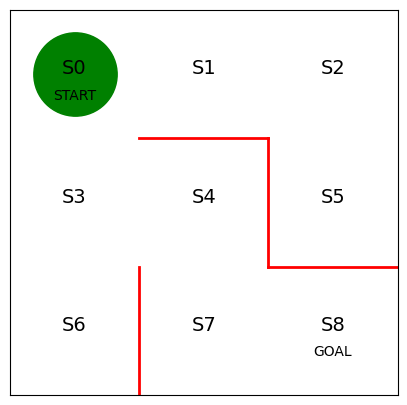

In [36]:
# 랜덤으로 구현한 미로 탐색
# 초기 상태의 미로 모습
import matplotlib.pyplot as plt
%matplotlib inline
# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)
# 상태를 의미하는 문자열(S0~S8) 표시
#ha: horizontal alignment
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')
# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False,
    top=False, labelbottom=False, right=False, left=False,
    labelleft=False)
# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [37]:
import numpy as np
# 정책(policy) : 에이전시가 어떻게 행동할지 결정하는 규칙
# 정책을 결정하는 파라미터의 초기값 theta_0를 설정
# row : 상태 0~7
# col : 행동방향(시계방향 - 상,우,하,좌)
theta_0 = np.array([[np.nan, 1, 1, np.nan], # s0
                    [np.nan, 1, np.nan, 1], # s1
                    [np.nan, np.nan, 1, 1], # s2
                    [1, 1, 1, np.nan], # s3
                    [np.nan, np.nan, 1, 1], # s4
                    [1, np.nan, np.nan, np.nan], # s5
                    [1, np.nan, np.nan, np.nan], # s6
                    [1, 1, np.nan, np.nan], # s7
                    ])
#s1에서는 오른쪽과 아래쪽으로만 이동할 수 있음
#s8은 목표지점이므로 정책이 없음

In [38]:
# 정책 파라미터 theta를 행동정책 pi로 변환하는 함수
def simple_convert_into_pi_from_theta(theta):
    # theta의 행렬 크기 계산
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        # 비율 계산
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    pi = np.nan_to_num(pi) # nan을 0으로 변환
    return pi
# 초기 정책 pi_0을 계산
pi_0 = simple_convert_into_pi_from_theta(theta_0)
# 초기 정책 pi_0을 출력
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [39]:
# 1단계 이동 후의 상태 s를 계산하는 함수
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s, :]의 확률에 따라, direction 값이 선택된다
    if next_direction == "up":
        s_next = s - 3 # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        s_next = s + 1 # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        s_next = s + 3 # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        s_next = s - 1 # 왼쪽으로 이동하면 상태값이 1 줄어든다
    return s_next

In [40]:
# 목표 지점에 이를 때까지 에이전트를 계속 이동시키는 함수
def goal_maze(pi):
    s = 0 # 시작 지점
    state_history = [0] # 에이전트의 경로를 기록하는 리스트
    # 목표 지점에 도착할 때까지 반복
    while True:
        next_s = get_next_s(pi, s)
        # 경로 리스트에 다음 상태(위치)를 추가
        state_history.append(next_s)
        if next_s == 8: # 목표 지점에 이르면 종료
            break
        else:
            s = next_s
    return state_history
# 목표 지점에 이를 때까지 미로 안을 이동
state_history = goal_maze(pi_0)
print(state_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(state_history) - 1) + "단계입니다")

[0, 3, 0, 3, 4, 7, 4, 3, 0, 1, 0, 1, 2, 5, 2, 1, 2, 1, 0, 3, 6, 3, 4, 3, 6, 3, 6, 3, 6, 3, 0, 1, 0, 3, 6, 3, 0, 3, 0, 3, 0, 3, 6, 3, 0, 1, 0, 3, 6, 3, 4, 3, 0, 3, 6, 3, 6, 3, 6, 3, 4, 3, 4, 7, 8]
목표 지점에 이르기까지 걸린 단계 수는 64단계입니다


In [42]:
# 에이전트의 이동 과정을 시각화
from matplotlib import animation
from IPython.display import HTML

#배경 이미지 초기화
def init():
    line.set_data([], [])
    return (line,)

#프레임 단위로 이미지 생성
def animate(i):
    state = state_history[i] # 현재 위치
    x = (state % 3) + 0.5 # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3) # y좌표 : 2.5에서 3으로 나눈 몫을 뺀 값
    line.set_data(x, y)
    return (line,)

# 초기화 함수와 프레임 단위 이미지 생성함수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init,
        frames=len(state_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

> 미로 - 정책경사

In [43]:
# 정책 경사 알고리즘으로 구현한 미로 탐색
# 정책을 최적화하는 목표함수를 미분해서 그 미분값에 따라 정책을 업데이트
# 경사상승법(Gradient Ascent)

#함수, 미로 앞이랑 코드 같음

In [44]:
# 정책 파라미터 theta를 행동정책 pi로 변환(소프트맥스 함수 사용)하는 함수
# 비율 계산에 소프트맥스 함수 사용
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    # theta의 행렬 크기를 구함
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    # theta를 exp(theta)로 변환
    exp_theta = np.exp(beta * theta)
    for i in range(0, m):
        # 단순 비율이 아닌 softmax로 계산하는 코드
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
    pi = np.nan_to_num(pi) # nan을 0으로 변환
    return pi

# 초기 정책 pi_0을 계산(초기값은 랜덤과 동일함)
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [45]:
# 행동 a를 취한 후의 상태 s를 구하는 함수
def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]의 확률을 따라, direction값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s, :])
    if next_direction == "up":
        action = 0
        s_next = s - 3 # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1 # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + 3 # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1 # 왼쪽으로 이동하면 상태값이 1 줄어든다
    return [action, s_next]

In [46]:
# 미로를 빠져나오는 함수, 상태와 행동의 히스토리를 출력한다
def goal_maze_ret_s_a(pi):
    s = 0 # 시작 지점
    # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트
    s_a_history = [[0, np.nan]]
    # 목표 지점에 이를 때까지 반복
    while True:
        [action, next_s] = get_action_and_next_s(pi, s)
        # 현재 상태의 동작을(마지막이므로 인덱스가 -1) 히스토리에 추가
        s_a_history[-1][1] = action
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 설정
        s_a_history.append([next_s, np.nan])
        # 목표 지점에 이르면 종료
        if next_s == 8:
            break
        else:
            s = next_s
    return s_a_history

In [47]:
# 초기 정책으로 미로를 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

[[0, 2], [3, 0], [0, 2], [3, 0], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다


In [48]:
# 정책 경사 알고리즘으로 정책 수정
# theta를 수정하는 함수
def update_theta(theta, pi, s_a_history):
    # 학습률
    eta = 0.1
    # 목표 지점에 이르기까지 걸린 단계 수
    T = len(s_a_history) - 1
    # theta의 행렬 크기
    [m, n] = theta.shape
    # delta_theta를 구하기 위해 원본 복사(넘파이는 계산을 빠르게 하기 위해 얕은 복사를 사용함)
    delta_theta = theta.copy()

    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            # theta가 nan이 아닌 경우
            if not(np.isnan(theta[i, j])):
                # 히스토리에서 상태 i인 것만 모은 리스트
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 상태 i에서 행동 j를 취한 경우만 모은 리스트
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 상태 i에서 모든 행동을 취한 횟수
                N_i = len(SA_i)
                # 상태 i에서 행동 j를 취한 횟수
                N_ij = len(SA_ij)
                
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i)/T
    new_theta = theta + eta * delta_theta
    return new_theta

In [49]:
# 정책 경사 알고리즘으로 미로 빠져나오기
# 정책의 변화가 10^-4 보다 작아지면 학습을 종료
stop_epsilon = 10**-4
theta = theta_0
pi = pi_0
is_continue = True
count = 1
# is_continue가 False가 될 때까지 반복
while is_continue:
    # 정책 π를 따라 미로를 탐색한 히스토리를 구함
    s_a_history = goal_maze_ret_s_a(pi)
    # 파라미터 Θ를 수정
    new_theta = update_theta(theta, pi, s_a_history)
    # 정책 π를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    # 정책의 변화를 출력
    print(np.sum(np.abs(new_pi - pi)))
    # 목적지에 이르기까지 걸린 단계수 출력
    print("단계수: " + str(len(s_a_history) - 1))
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.006862976025805989
단계수: 68
0.021734352879159147
단계수: 12
0.03251379315529601
단계수: 6
0.010410635098526688
단계수: 52
0.0067923289589243985
단계수: 176
0.014904487212811679
단계수: 14
0.011719464846145222
단계수: 30
0.01665407372349581
단계수: 12
0.007561297296913239
단계수: 86
0.00668834235671617
단계수: 52
0.01453363999603341
단계수: 26
0.004956420619630197
단계수: 96
0.009623590295191442
단계수: 26
0.01648858023988886
단계수: 10
0.005643046259337592
단계수: 34
0.017617553492596916
단계수: 48
0.013884618570268792
단계수: 36
0.04793964648687293
단계수: 4
0.010938951690652121
단계수: 20
0.01685286932915464
단계수: 18
0.005022113292612984
단계수: 118
0.008605321849290581
단계수: 28
0.04732815399534274
단계수: 4
0.007462518125331108
단계수: 78
0.006772922292916983
단계수: 56
0.01022342605679144
단계수: 58
0.008515218738544328
단계수: 80
0.02016235656076859
단계수: 12
0.01826550935371196
단계수: 40
0.012174764654954318
단계수: 16
0.012699743536315256
단계수: 14
0.02142394026250727
단계수: 14
0.010824986044476237
단계수: 72
0.03023206330375222
단계수: 6
0.014724836503018646
단계수: 38

In [50]:
# 학습이 끝난 정책을 확인
# 유효 자리수 3, 지수는 표현하지 않음
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.016 0.984 0.   ]
 [0.    0.261 0.    0.739]
 [0.    0.    0.452 0.548]
 [0.011 0.979 0.01  0.   ]
 [0.    0.    0.986 0.014]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


In [51]:
# 에이전트의 이동 과정을 시각화
from matplotlib import animation
from IPython.display import HTML
def init():
    # 배경 이미지 초기화
    line.set_data([], [])
    return (line,)

def animate(i):
    # 프레임 단위로 이미지 생성
    state = s_a_history[i][0] # 현재 위치
    x = (state % 3) + 0.5 # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3) # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)
# 초기화 함수와 프레임 단위 이미지 생성한수를 사용하여 애니메이션생성
anim = animation.FuncAnimation(fig, animate, init_func=init,
        frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())

In [52]:
# 정책 수정
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.    0.494 0.506 0.   ]
 [0.    0.5   0.    0.5  ]
 [0.    0.    0.5   0.5  ]
 [0.331 0.339 0.331 0.   ]
 [0.    0.    0.506 0.494]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.494 0.506 0.    0.   ]]


> 미로-가치반복

In [53]:
# 가치반복 알고리즘으로 미로 탐색 (시간차 학습)
# 다음 단계까지 고려해서 학습

In [55]:
# 행동가치 함수 Q의 초기 상태
# 열과 행의 개수
[a, b] = theta_0.shape
# * theta0 로 요소 단위 곱셈을 수행, Q에서 벽 방향으로 이동하는 행동에는 nan을 부여
Q = np.random.rand(a, b) * theta_0

In [61]:
# ε-greedy 알고리즘(입실론 탐욕적 알고리즘) 구현
# greedy 알고리즘(탐욕적 알고리즘) : 미리 정한 기준에 따라서 매번 가장 좋아 보이는 답을 선택하는 알고리즘, 강화학습에서는 행동가치함수 Q값이 최대가 되는 행동을 선택하는 것을 의미함
# 탐욕적 알고리즘은 항상 최적해를 얻지 못하는 단점이 있는데 이 단점을 보완하기 위한 알고리즘이 ε-greedy 알고리즘
# 입실론 값은 0~1 랜덤으로 선택, 1-ε 값은 최상의 확률을 냈던 행동을선택함

#행동을 결정하는 함수
def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    # 행동을 결정
    if np.random.rand() < epsilon:
        # 확률 ε로 무작위 행동을 선택함
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Q값이 최대가 되는 행동을 선택함
        next_direction = direction[np.nanargmax(Q[s, :])]
    # 행동을 숫자 인덱스로 변환
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
    return action

#행동을 인자로 받아 다음 상태를 구하는 함수
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a] # 행동 a의 방향
    # 행동으로 다음 상태를 결정
    if next_direction == "up":
        s_next = s - 3 # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        s_next = s + 1 # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        s_next = s + 3 # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        s_next = s - 1 # 왼쪽으로 이동하면 상태값이 1 줄어든다
    return s_next

In [62]:
# Sarsa 알고리즘으로 행동가치 함수 Q를 수정
# s 현재 상태, a 행동, r 즉각보상, s 다음 단계의 상태, a 다음 단계의 행동
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8: # 목표 지점에 도달한 경우(다음 상태는 없음)
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    return Q

In [63]:
# Sarsa 알고리즘으로 미로를 빠져나오는 함수, 상태 및 행동 그리고 Q값의 히스토리를 출력한다
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0 # 시작 지점
    a = a_next = get_action(s, Q, epsilon, pi) # 첫 번째 행동
    s_a_history = [[0, np.nan]] # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트
    while True: # 목표 지점에 이를 때까지 반복
        a = a_next # 행동 결정
        # 현재 상태(마지막이므로 인덱스가 -1)을 히스토리에 추가
        s_a_history[-1][1] = a
        # 다음 단계의 상태를 구함
        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다
        s_a_history.append([s_next, np.nan])
        # 보상을 부여하고 다음 행동을 계산함
        if s_next == 8:
            r = 1 # 목표 지점에 도달했다면 보상을 부여
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 다음 행동 a_next를 계산
        # 가치함수를 수정
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        # 종료 여부 판정
        if s_next == 8: # 목표 지점에 도달하면 종료
            break
        else:
            s = s_next
    return [s_a_history, Q]

In [64]:
# Sarsa 알고리즘으로 미로 빠져나오기
# 미로를 헤매지 않고 곧장 빠져나갈 수 있도록 반복적으로 가치함수를 수정하는 코드
eta = 0.1 # 학습률
gamma = 0.9 # 시간할인율
epsilon = 0.5 # ε-greedy 알고리즘 epsilon 초깃값
v = np.nanmax(Q, axis=1) # 각 상태마다 가치의 최댓값을 계산
is_continue = True
episode = 1
while is_continue: # is_continue의 값이 False가 될 때까지 반복
    print("에피소드: " + str(episode))
    # ε 값을 조금씩 감소시킴
    epsilon = epsilon / 2
    # Sarsa 알고리즘으로 미로를 빠져나온 후, 
    # 결과로 나온 행동 히스토리와 Q값을 변수에 저장
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    # 상태가치의 변화
    new_v = np.nanmax(Q, axis=1) # 각 상태마다 행동가치의 최댓값을 계산
    print(np.sum(np.abs(new_v - v))) # 상태가치 함수의 변화를 출력
    v = new_v
    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")
    # 100 에피소드 반복
    episode = episode + 1
    if episode > 100:
        break

에피소드: 1
2.2718049039454993
목표 지점에 이르기까지 걸린 단계 수는 404단계입니다
에피소드: 2
0.5254440738141357
목표 지점에 이르기까지 걸린 단계 수는 170단계입니다
에피소드: 3
0.07578459171825613
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
에피소드: 4
0.06309609973914476
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
에피소드: 5
0.054391411682316815
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
에피소드: 6
0.06150358890416252
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
에피소드: 7
0.05533429216054059
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 8
0.057732445964858714
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
에피소드: 9
0.0527768195009069
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 10
0.052144203195154615
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 11
0.05157796180934798
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 12
0.05096512545404008
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 13
0.05030397702909817
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 14
0.0495933325178361
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 15
0.048832673783660685
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 16
0.048022207790949345
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 17
0.04716287175204581
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드: 18
0.046256

In [65]:
# 유효 자리수 3, 지수는 표현하지 않음
np.set_printoptions(precision=3, suppress=True)
Q
#v

array([[  nan, 0.319, 0.725,   nan],
       [  nan, 0.203,   nan, 0.316],
       [  nan,   nan, 0.195, 0.201],
       [0.332, 0.809, 0.33 ,   nan],
       [  nan,   nan, 0.9  , 0.33 ],
       [0.193,   nan,   nan,   nan],
       [0.33 ,   nan,   nan,   nan],
       [0.428, 1.   ,   nan,   nan]])

In [66]:
# 에이전트의 이동 과정을 시각화
from matplotlib import animation
from IPython.display import HTML
def init():
    # 배경 이미지 초기화
    line.set_data([], [])
    return (line,)
def animate(i):
    # 프레임 단위로 이미지 생성
    state = s_a_history[i][0] # 현재 위치
    x = (state % 3) + 0.5 # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3) # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)
# 초기화 함수와 프레임 단위 이미지 생성한수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init,
        frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())